In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import seaborn as sns
import sklearn as sk

**Import files and make big primer dataframe**

In [2]:
primer_filenames = ["Ba_1_primer_stats.csv","Ba_2_primer_stats.csv", "Ba_3_primer_stats.csv",
            "Ba_4_primer_stats.csv", "Ba_5_V35_primer_stats.csv", "Ba_5_V3_primer_stats.csv",
            "Ba_6_V4_primer_stats.csv", "Ba_HighSH_primer_stats.csv", "Ba_HighSpec_primer_stats.csv", 
            "Ba_LowSH_primer_stats.csv", "Ba_OkX_primer_stats.csv", "Ba_V45_primer_stats.csv", 
            "Ft_1_primer_stats.csv", "Ft_2_primer_stats.csv", "Ft_2_V2_primer_stats.csv",
            "Yp_1_primer_stats.csv", "Yp_2_primer_stats.csv", "Yp_1_V2_primer_stats.csv"]

pdfs = []
for filename in primer_filenames:
    pdfs.append(pd.read_csv(filename))
primer_frame = pd.concat(pdfs, axis=0, ignore_index=True, sort=False)

**Same thing for outcomes**

In [3]:
outcome_filenames = ["Ba_1_outcomes.csv","Ba_2_outcomes.csv", "Ba_3_outcomes.csv",
            "Ba_4_outcomes.csv", "Ba_5_V35_outcomes.csv", "Ba_5_V3_outcomes.csv",
            "Ba_6_V4_outcomes.csv", "Ba_HighSH_outcomes.csv", "Ba_HighSpec_outcomes.csv", 
            "Ba_LowSH_outcomes.csv", "Ba_OkX_outcomes.csv", "Ba_V45_outcomes.csv", 
            "Ft_1_outcomes.csv", "Ft_2_outcomes.csv", "Ft_2_V2_outcomes.csv",
            "Yp_1_outcomes.csv", "Yp_2_outcomes.csv", "Yp_1_V2_outcomes.csv"]
odfs = []
for filename in outcome_filenames:
    odfs.append(pd.read_csv(filename))
    
outcome_frame = pd.concat(odfs, axis=0, ignore_index=True, sort=False)

**Figure with primer, experiment, sample, and amplicon count**

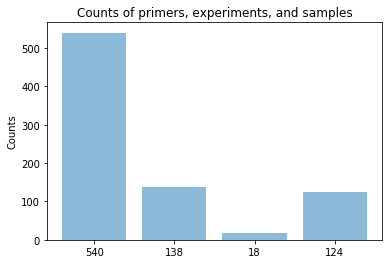

In [4]:
counts = [540, 138, 18, 124]
labels = ["Primers", "Samples", "Primer set", "Amplicons"]
y_pos = np.arange(len(labels))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, counts)
plt.ylabel('Counts')
plt.title('Counts of primers, experiments, and samples')

plt.show()

**Figure with samples per primer set/experiment**

In [5]:
sample_counts_per_set = []
for primer_set in odfs:
    sample_counts_per_set.append(primer_set['sample_id'].nunique()
                                 
set_names = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 
             'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18']
df = {
    'Set Names': ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 
             'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18'], 
    'Sample Count': [4, 12, 36, 11, 18, 9, 16, 9, 9, 9, 9, 18, 11, 12, 12, 12, 12, 6],
     }
df = pd.DataFrame(df)
df
#heatmap1_data = pd.pivot_table(df, values='Sample Counts', columns='Set Names')
ax = df.plt.bar(x='Set Names', y='Sample Count', rot=0)

SyntaxError: invalid syntax (<ipython-input-5-1ebfd1fe2451>, line 5)

**BA Amplicon Count**

In [ ]:
ba_files = ["Ba_1_outcomes.csv","Ba_2_outcomes.csv", "Ba_3_outcomes.csv",
            "Ba_4_outcomes.csv", "Ba_5_V35_outcomes.csv", "Ba_5_V3_outcomes.csv",
            "Ba_6_V4_outcomes.csv", "Ba_HighSH_outcomes.csv", "Ba_HighSpec_outcomes.csv", 
            "Ba_LowSH_outcomes.csv", "Ba_OkX_outcomes.csv", "Ba_V45_outcomes.csv"]
ba_read = []

for f in ba_files:
    ba_read.append(pd.read_csv(f))
ba_frame = pd.concat(ba_read, axis=0, ignore_index=True, sort=False)
ba_frame['amplicon_id'].nunique()

**YP Amplicon Count**

In [ ]:
yp_files = ["Yp_1_outcomes.csv", "Yp_2_outcomes.csv", "Yp_1_V2_outcomes.csv"]

yp_read = []

for f in yp_files:
    yp_read.append(pd.read_csv(f))
yp_frame = pd.concat(yp_read, axis=0, ignore_index=True, sort=False)

yp_frame['amplicon_id'].nunique()

**FT Amplicon Count**

In [ ]:
ft_files = ["Ft_1_outcomes.csv", "Ft_2_outcomes.csv", "Ft_2_V2_outcomes.csv"]

ft_read = []

for f in ft_files:
    ft_read.append(pd.read_csv(f))
ft_frame = pd.concat(ft_read, axis = 0, ignore_index =True, sort =False)
ft_frame['amplicon_id'].nunique()

**Standardize values for upcoming figure**

In [ ]:
main_df = primer_frame.set_index('Primer_Name')
main_df = main_df.sort_values(by=["Amplicon"]) 

main_df = main_df[["Primer_Length", "Tm", "GC_Content", "Length_Longest_Homopolymer", "Percent_Homopolymer"]] 


main_df = main_df.drop_duplicates() 
main_df_std=(main_df-main_df.mean())/main_df.std()

**Figure 3: Heatmap with primers and their features (standardized)**

In [ ]:

#ax = sns.heatmap(main_df_std, yticklabels=1) 

plt.figure(figsize = (100,80))
ax = sns.clustermap(main_df_std, row_cluster = False)

**Figure 1: FacetGrid stuff with reads per amplicon in a given sample**

In [ ]:
samp_df.head()
ba = samp_df[samp_df.species == "Ba"]
# ba.shape, samp_df.shape

samp_df.species.unique()
ft_frame.head()

In [ ]:
# I am trying to change this into a for loop where it goes 
# over each csv, but I am having trouble running it. 

#for f in yp_filenames:
#    df = pd.read_csv(f)
#    df.drop_duplicates
    
#    g = sns.FacetGrid(df, col = 'sample_id', row = 'amplicon_id')
#    g = g.map(plt.scatter, 'amplicon_id', )
samp_df = pd.read_csv("Ba_1_outcomes.csv")


g = sns.FacetGrid(ft_frame, col= "sample_id", sharey = False, col_wrap = 4)
#grouped_stuff = samp_df.groupby(['sample_id']).n_reads.sum()
#samp_df

g = g.map(plt.scatter, 'amplicon_id', 'n_reads').set(yscale = 'log')


**Figure 2: Binary heatmap of primers per primer set/experiment**

In [ ]:
name_count_list = []
for number, data in enumerate(pdfs):
    df = pd.DataFrame(data=data)
    name_counts = df['Seq'].value_counts()
    name_counts.name = "df_" + str(number)
    name_count_list.append(name_counts)
dfs = pd.concat(name_count_list, axis=1, sort=False)
dfs = dfs.fillna(0)

flatui = ["#dfe6e9", "#2d3436"]
dfs.columns = [primer_filenames]
cbar_kws = { 'ticks' : [0, 1] }
plt.figure(figsize = (40, 20))

sns.heatmap(dfs, cmap = flatui, cbar_kws = cbar_kws, yticklabels = False)

**Feature matrix**

In [27]:
primer_files = !ls ./primer_inputs/*.csv
primer_files


['./primer_inputs/Ba_1_outcomes.csv',
 './primer_inputs/Ba_1_primer_stats.csv',
 './primer_inputs/Ba_2_outcomes.csv',
 './primer_inputs/Ba_2_primer_stats.csv',
 './primer_inputs/Ba_3_outcomes.csv',
 './primer_inputs/Ba_3_primer_stats.csv',
 './primer_inputs/Ba_4_outcomes.csv',
 './primer_inputs/Ba_4_primer_stats.csv',
 './primer_inputs/Ba_5_V35_outcomes.csv',
 './primer_inputs/Ba_5_V35_primer_stats.csv',
 './primer_inputs/Ba_5_V3_outcomes.csv',
 './primer_inputs/Ba_5_V3_primer_stats.csv',
 './primer_inputs/Ba_6_V4_outcomes.csv',
 './primer_inputs/Ba_6_V4_primer_stats.csv',
 './primer_inputs/Ba_HighSH_outcomes.csv',
 './primer_inputs/Ba_HighSH_primer_stats.csv',
 './primer_inputs/Ba_HighSpec_outcomes.csv',
 './primer_inputs/Ba_HighSpec_primer_stats.csv',
 './primer_inputs/Ba_LowSH_outcomes.csv',
 './primer_inputs/Ba_LowSH_primer_stats.csv',
 './primer_inputs/Ba_OkX_outcomes.csv',
 './primer_inputs/Ba_OkX_primer_stats.csv',
 './primer_inputs/Ba_V45_outcomes.csv',
 './primer_inputs/Ba_V45

In [32]:
primer_df = pd.DataFrame([])

for primer_file in primer_files:
  exp_name = os.path.splitext(os.path.basename(primer_file))[0].rstrip("_primer_stats")
  df = pd.read_csv(primer_file, usecols = ['Primer_Name', 'Seq', 'Amplicon',
                            'Primer_Length', 'Tm', 'Delta Tm',
                            'GC_Content', 'Length_Longest_Homopolymer', 'Percent_Homopolymer'])
  df['exp'] = exp_name
  primer_df = primer_df.append(df)

ValueError: Usecols do not match columns, columns expected but not found: ['Seq', 'Primer_Length', 'Length_Longest_Homopolymer', 'Percent_Homopolymer', 'Delta Tm', 'Primer_Name', 'GC_Content', 'Amplicon', 'Tm']